In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def show(img):
    plt.imshow(img)
    plt.show()

In [3]:
def calHist(img):
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    
    return np.argmax(hist)

In [4]:
def remove_background(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if j>180 and j<185:
                img[i][j]=0

In [ ]:
import cv2
import numpy as np

img = cv2.imread(r'./thuoc.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresholded_img = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY_INV)[1]
# show(thresholded_img)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(thresholded_img, kernel, iterations=7)
# show(dilated)


contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
threshold_area = 2000
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]
boxes = [cv2.boundingRect(cnt) for cnt in contours]
#tạo các bounding box cho chữ cái trên hình
# for box in boxes:
#     x, y, w, h = box
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
# plt.imshow(img)

#cut the bounding box
crop_img=[]
for box in boxes:
    x, y, w, h = box
    crop_img.append(gray[y:y+h, x:x+w])
    
    
word_img = []    
plt.figure(figsize=(11,4))
for i,img in enumerate(crop_img):
    plt.subplot(math.ceil(len(crop_img)/4),4,i+1)
    new_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)[1]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,3))
    dilated = cv2.dilate(new_img, kernel, iterations=2)
    
    most_frequency_value = calHist(img)
    
    h_mask = (img.shape[0]/32)
    mask = np.full((img.shape[0],int(128*h_mask)),most_frequency_value,dtype=np.uint8)
    mask[0:img.shape[0],0:img.shape[1]] = img
    new_img = np.array(mask)
    new_img = cv2.resize(new_img,(128,32))
    
    plt.imshow(new_img)
    word_img.append(new_img)
word_img[0]

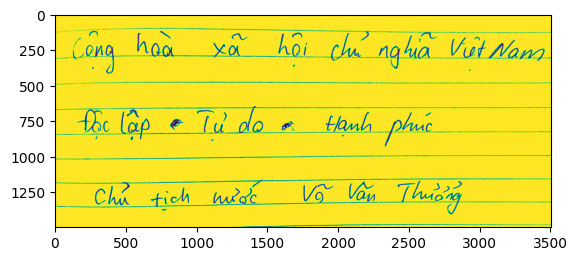

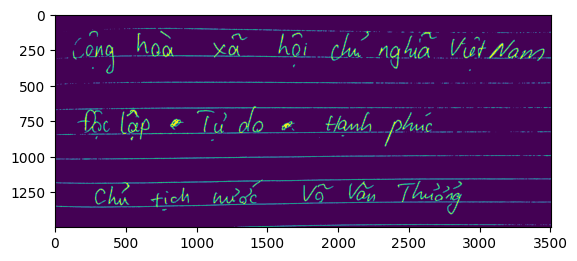

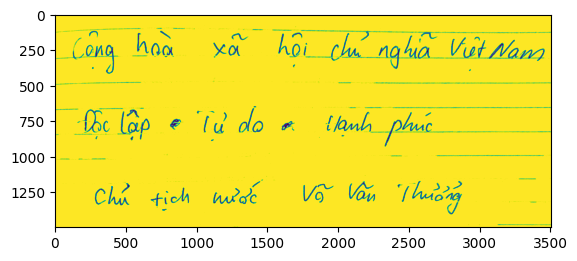

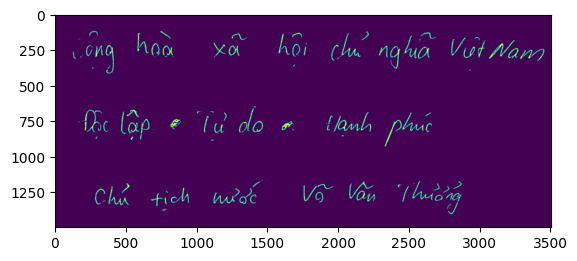

In [15]:
img = cv2.imread(r'./vanban5.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(gray)
result = img.copy()
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
show(thresh)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 3)
# plt.imshow(result)

gray_lines_removed = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
show(gray_lines_removed)

thresholded_img = cv2.threshold(gray_lines_removed, 95, 255, cv2.THRESH_BINARY_INV)[1]
show(thresholded_img)

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
# dilated = cv2.dilate(thresholded_img, kernel, iterations=7)
# show(dilated)

# contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# threshold_area = 12000
# contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]
# boxes = [cv2.boundingRect(cnt) for cnt in contours]
# # tạo các bounding box cho chữ cái trên hình
# for box in boxes:
#     x, y, w, h = box
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 6)
# plt.imshow(img)

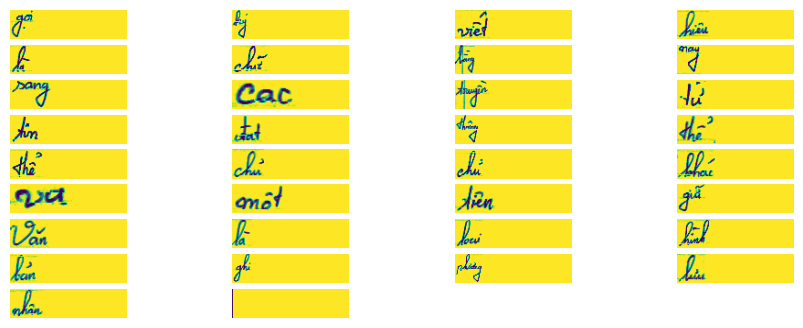

In [7]:
crop_img=[]
for box in boxes:
    x, y, w, h = box
    crop_img.append(gray_lines_removed[y:y+h, x:x+w])
    
    
word_img = []    
plt.figure(figsize=(11,4))
for i,img in enumerate(crop_img):
    plt.subplot(math.ceil(len(crop_img)/4),4,i+1)
    new_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)[1]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,3))
    dilated = cv2.dilate(new_img, kernel, iterations=2)
    
    most_frequency_value = calHist(img)
    
    h_mask = (img.shape[0]/32)
    mask = np.full((img.shape[0],int(128*h_mask)),most_frequency_value,dtype=np.uint8)
    mask[0:img.shape[0],0:img.shape[1]] = img
    new_img = np.array(mask)
#     new_img = cv2.resize(new_img,(128,32))

    new_img = cv2.bitwise_not(new_img)
    dilated = cv2.dilate(new_img, kernel, iterations=3)
    dilated = cv2.bitwise_not(dilated)
    dilated = cv2.resize(dilated,(128,32))
    plt.imshow(dilated)
    plt.axis('off')
    word_img.append(dilated)

#     new_img = cv2.resize(new_img,(128,32))
#     plt.imshow(new_img)

In [98]:
boxes[19]

(706, 752, 246, 214)

In [108]:
crop_img[19].shape

(273, 690)

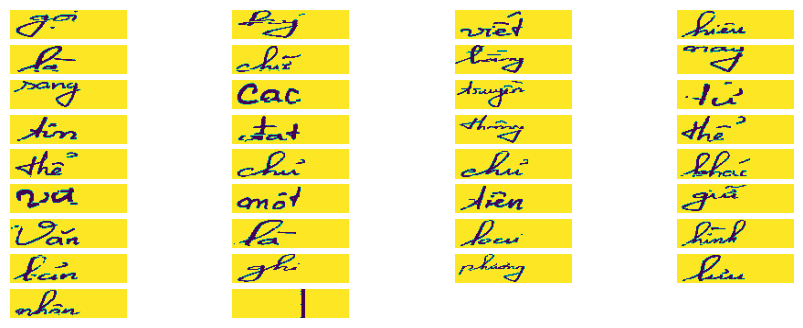

In [22]:
temp_crop_img=[]
for box in boxes:
    x, y, w, h = box
    temp_crop_img.append(gray_lines_removed[y:y+h, x:x+w])
crop_img=[]  
for i,box in enumerate(boxes):
    x, y, w, h = box
    crop_img.append(cv2.resize(temp_crop_img[i],(int(h*2.5),h)))
word_img = []    
plt.figure(figsize=(11,4))
for i,img in enumerate(crop_img):
    plt.subplot(math.ceil(len(crop_img)/4),4,i+1)
#     new_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)[1]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,3))
#     dilated = cv2.dilate(new_img, kernel, iterations=2)
    
    most_frequency_value = calHist(img)
    
    h_mask = (img.shape[0]/32)
    mask = np.full((img.shape[0],int(128*h_mask)),most_frequency_value,dtype=np.uint8)
    mask[0:img.shape[0],0:img.shape[1]] = img
    new_img = np.array(mask)
#     new_img = cv2.resize(new_img,(128,32))
    (thresh, blackAndWhiteImage) = cv2.threshold(new_img, 127, 255, cv2.THRESH_BINARY)
    new_img = cv2.bitwise_not(blackAndWhiteImage)
    dilated = cv2.dilate(new_img, kernel, iterations=3)
    dilated = cv2.bitwise_not(dilated)
    dilated = cv2.resize(dilated,(128,32))
    plt.imshow(dilated)
    plt.axis('off')
    word_img.append(dilated)

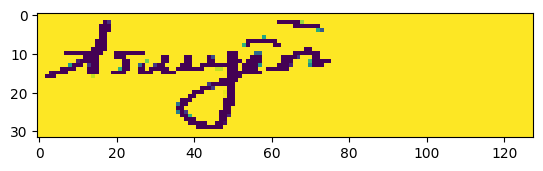

In [24]:
plt.imshow(word_img[10])

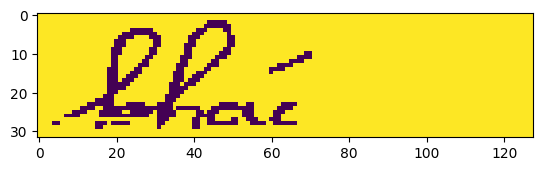

In [14]:
a = word_img[19]
(thresh, blackAndWhiteImage) = cv2.threshold(a, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

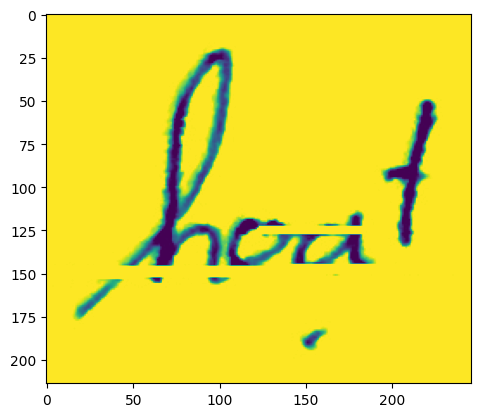

In [82]:
plt.imshow(cv2.resize(crop_img[19],(246,214)))

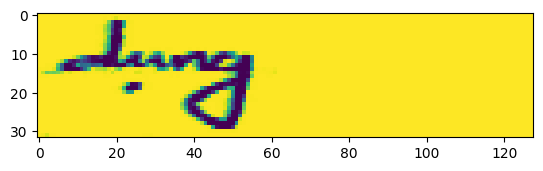

In [95]:
a=cv2.resize(crop_img[2],(int(214*2.2),214))
# a= crop_img[19]
most_frequency_value = calHist(a)

h_mask = (a.shape[0] / 28)
mask = np.full((a.shape[0], int(128 * h_mask)), most_frequency_value, dtype=np.uint8)
mask[0:a.shape[0], 0:a.shape[1]] = a
new_img = np.array(mask)
new_img = cv2.bitwise_not(new_img)
dilated = cv2.dilate(new_img, kernel, iterations=3)
dilated = cv2.bitwise_not(dilated)
dilated = cv2.resize(dilated, (128, 32))
plt.imshow(dilated)

In [ ]:
cv2.imwrite('Goi.png',word_img[5])

In [2]:
alphabets = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÀÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƒƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('./word_model_last.h5')
def predict(img):
    preds = model.predict(img)
    decoded = tf.keras.backend.get_value(
        tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0]) * preds.shape[1],
                                    greedy=True)[0][0])
    prediction = []
    for i in range(decoded.shape[0]):
        prediction.append(num_to_label(decoded[i]))
    return prediction

def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))

    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret += alphabets[ch]
    return ret

In [3]:
def transform_image(image):
    image = (255 - image) * (-10/255)
    return np.around(image)
def preprocess_image(img):
    # img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 32), cv2.INTER_CUBIC)


    # img = cv2.bitwise_not(img)
    # kernel = np.ones((1,2), np.uint8)
    # img = cv2.dilate(img, kernel, iterations=1)
    # img = cv2.bitwise_not(img)
    img = cv2.threshold(img, 255, 0, cv2.THRESH_TOZERO_INV)[1]

    img = cv2.transpose(img)
    # Transform image
    transformed_image = transform_image(img)
    '''
    Next step must reshape image to (-1,128,32,1 )
    '''
    return transformed_image

In [4]:
def calHist(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    return np.argmax(hist)


def preprocess_large_image(img):# img : gray scale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = img.copy()
    result = img.copy()
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255, 255, 255), 3)
#     gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    gray = result

    thresholded_img = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY_INV)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
    dilated = cv2.dilate(thresholded_img, kernel, iterations=9)

    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    threshold_area = 7000
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > threshold_area]
    boxes = [cv2.boundingRect(cnt) for cnt in contours]

    crop_img = []
    for box in boxes:
        x, y, w, h = box
        crop_img.append(gray[y:y + h, x:x + w])

    word_img = []
#     plt.figure(figsize=(11, 4))
    for i, img in enumerate(crop_img):
#         plt.subplot(math.ceil(len(crop_img) / 4), 4, i + 1)
        new_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)[1]

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 3))
        dilated = cv2.dilate(new_img, kernel, iterations=2)

        most_frequency_value = calHist(img)

        h_mask = (img.shape[0] / 38)
        mask = np.full((img.shape[0], int(128 * h_mask)), most_frequency_value, dtype=np.uint8)
        mask[0:img.shape[0], 0:img.shape[1]] = img
        new_img = np.array(mask)
        #     new_img = cv2.resize(new_img,(128,32))

        new_img = cv2.bitwise_not(new_img)
        dilated = cv2.dilate(new_img, kernel, iterations=3)
        dilated = cv2.bitwise_not(dilated)
        dilated = cv2.resize(dilated, (128, 32))
#         plt.imshow(dilated)
#         plt.axis('off')
        word_img.append(dilated)
    return word_img,boxes

In [14]:
from PIL import Image, ImageFont,ImageDraw
img = Image.open(r'./vanban.png').convert('L')

img=np.array(img)
word_image,boxes = preprocess_large_image(img)
prediction = []
for img in word_image:
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = preprocess_image(img)
    img = img.reshape(-1,128,32,1)
    prediction.append(predict(img))



In [15]:
prediction

[['gia'],
 ['ky'],
 ['viết'],
 ['hiêu'],
 ['là'],
 ['chứ'],
 ['làng'],
 ['nay'],
 ['xang'],
 ['rao'],
 ['tuyền'],
 ['tử'],
 ['tân'],
 ['đất'],
 ['thông'],
 ['thể'],
 ['thể'],
 ['chủ'],
 ['chủ'],
 ['khác'],
 ['sa'],
 ['một'],
 ['hiện'],
 ['giá'],
 ['Văn'],
 ['là'],
 ['bai'],
 ['hất'],
 ['băn'],
 ['ghi'],
 ['pnhương'],
 ['lau'],
 ['nhân'],
 ['1']]

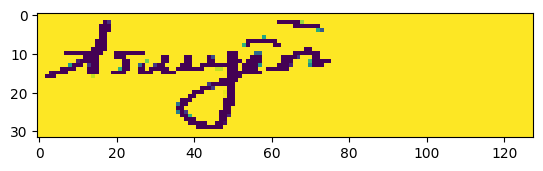

In [31]:
plt.imshow(word_img[10])

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


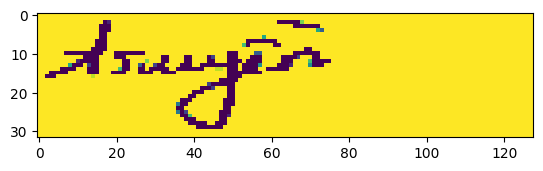

In [33]:
a = word_img[10]
normalized_img = cv2.normalize(a, None, alpha=0, beta=10, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
print(normalized_img)

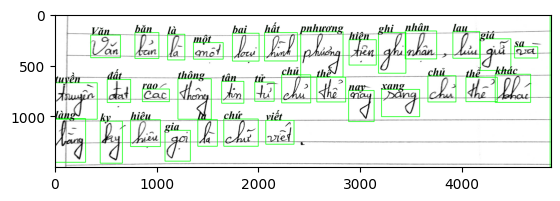

In [39]:
font = ImageFont.truetype(r"C:\Windows\Fonts\Times New Roman\timesbi.ttf", 110)
img = cv2.imread(r'./vanban.png')

for box in boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(img)


for i,box in enumerate(boxes):
    x, y, w, h = box
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y-100),  prediction[i][0], font = font,fill = (0,10,0))
    img = np.asarray(img_pil)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [23]:
prediction[1][0]

'ky'

In [ ]:
word_img[0].shape

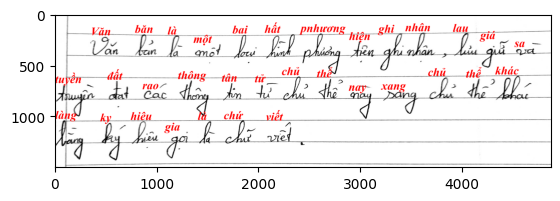

In [46]:
font = ImageFont.truetype(r"C:\Windows\Fonts\Times New Roman\timesbi.ttf", 115)
img = Image.open(r'./vanban.png')
draw = ImageDraw.Draw(img)
for i,box in enumerate(boxes):
    x, y, w, h = box
    draw.text((x,y-100),  prediction[i][0], font = font,fill = (255,0,0))
plt.imshow(img)